In [1]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3
import talib

tar: Error opening archive: Failed to open '\\.\tape0'
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  3959    0  3959    0     0   3149      0 --:--:--  0:00:01 --:--:--  3152

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0  503k    0  1438    0     0    532      0  0:16:08  0:00:02  0:16:06  1064
  3  503k    3 17822    0     0   6571      0  0:01:18  0:00:02  0:01:16 13065
curl: (23) Failure writing output to destination
tar: Error opening archive: Failed to open '\\.\tape0'
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --

In [2]:
!pip install pandas_ta

In [3]:
!pip install yfinance

In [4]:
!pip install mplfinance

     -------------------------------------- 73.1/73.1 kB 998.4 kB/s eta 0:00:00


In [5]:
!pip install vectorbt

In [6]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import yfinance as yf
import vectorbt as vbt
import mplfinance as mpf

In [7]:
data = pd.DataFrame()
data = data.ta.ticker('EURUSD=x', period = '5d', interval ='15m')

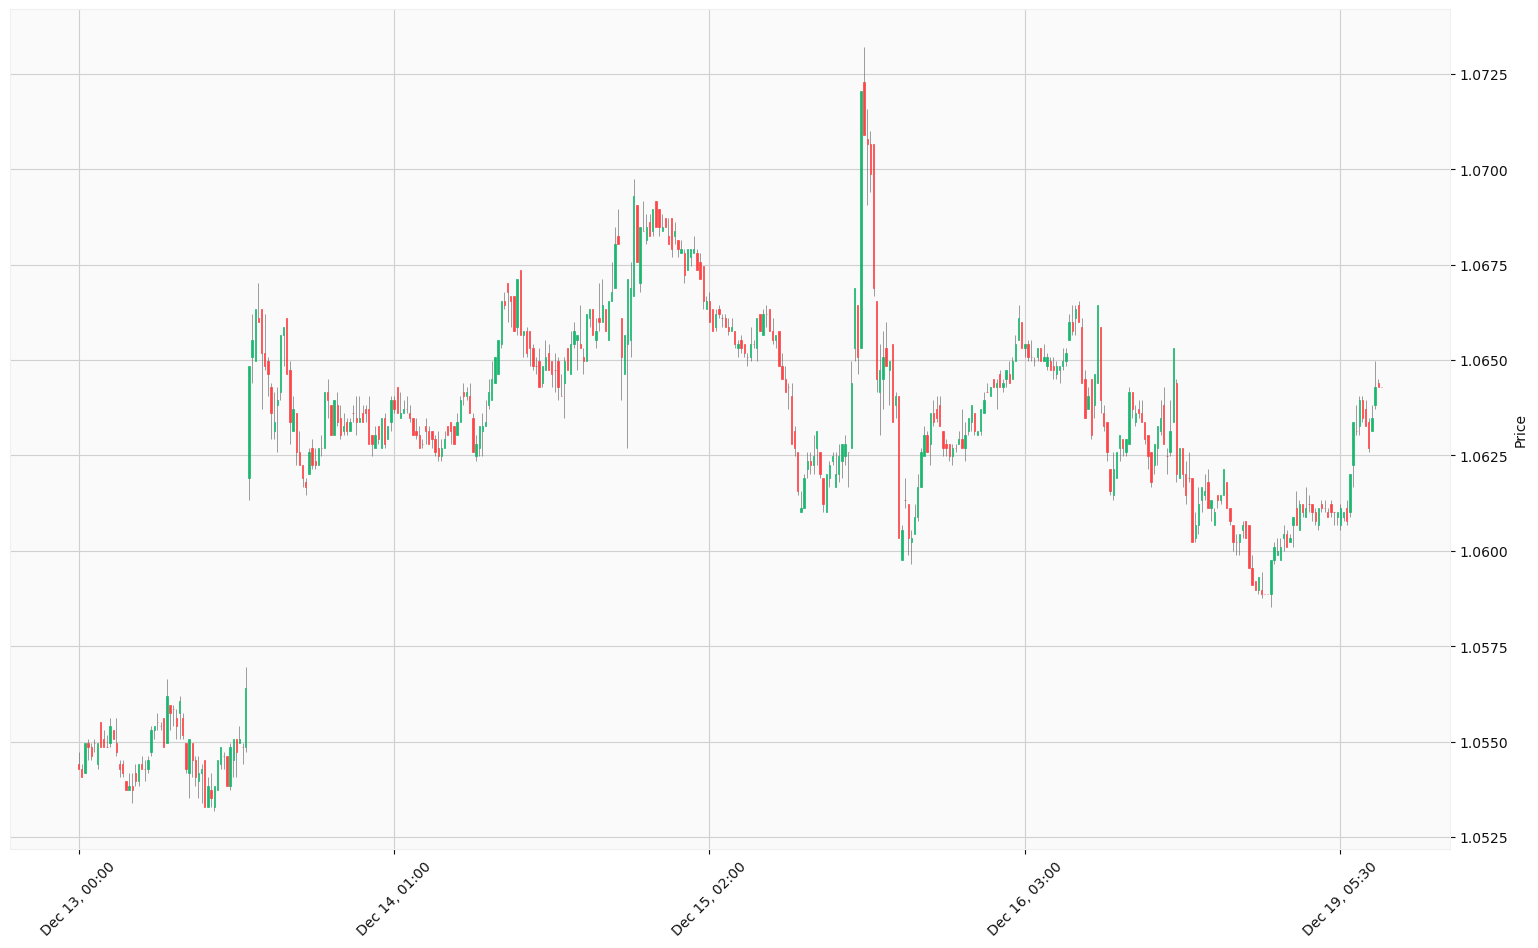

In [8]:
mpf.plot(data, type='candle',style='yahoo',figsize=(20,12))

In [9]:
data = pd.DataFrame()
data = data.ta.ticker('aapl', period = '10d', interval ='15m')

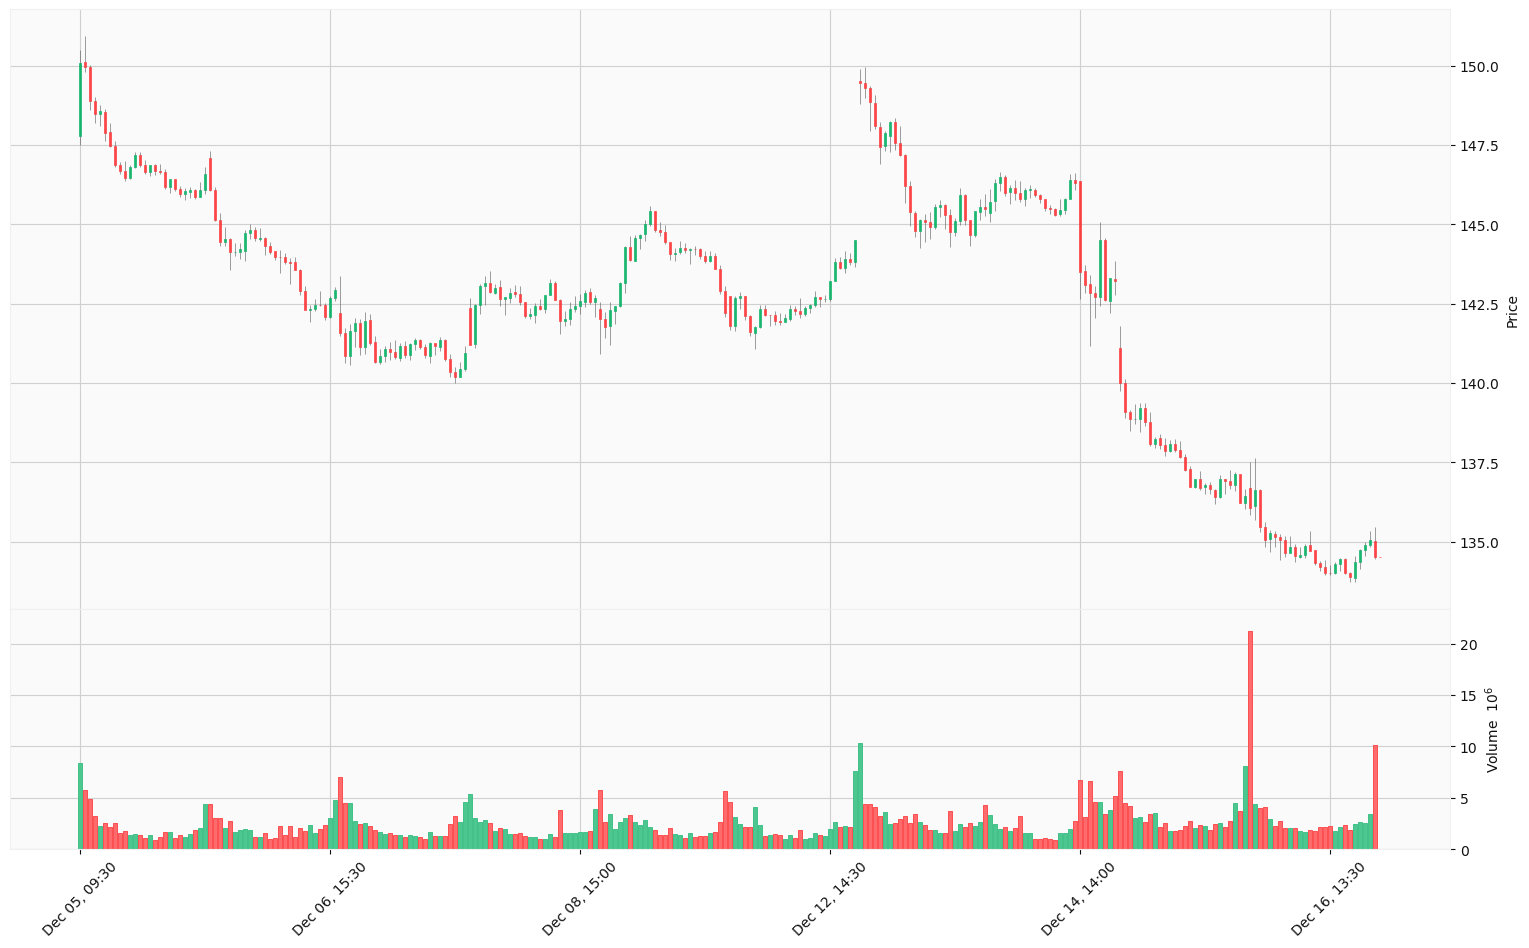

In [10]:
mpf.plot(data, type='candle',style='yahoo',figsize=(20,12),volume=True)

In [11]:
data.copy().ta.cdl_pattern(name="all").columns

Index(['CDL_2CROWS', 'CDL_3BLACKCROWS', 'CDL_3INSIDE', 'CDL_3LINESTRIKE',
       'CDL_3OUTSIDE', 'CDL_3STARSINSOUTH', 'CDL_3WHITESOLDIERS',
       'CDL_ABANDONEDBABY', 'CDL_ADVANCEBLOCK', 'CDL_BELTHOLD',
       'CDL_BREAKAWAY', 'CDL_CLOSINGMARUBOZU', 'CDL_CONCEALBABYSWALL',
       'CDL_COUNTERATTACK', 'CDL_DARKCLOUDCOVER', 'CDL_DOJI_10_0.1',
       'CDL_DOJISTAR', 'CDL_DRAGONFLYDOJI', 'CDL_ENGULFING',
       'CDL_EVENINGDOJISTAR', 'CDL_EVENINGSTAR', 'CDL_GAPSIDESIDEWHITE',
       'CDL_GRAVESTONEDOJI', 'CDL_HAMMER', 'CDL_HANGINGMAN', 'CDL_HARAMI',
       'CDL_HARAMICROSS', 'CDL_HIGHWAVE', 'CDL_HIKKAKE', 'CDL_HIKKAKEMOD',
       'CDL_HOMINGPIGEON', 'CDL_IDENTICAL3CROWS', 'CDL_INNECK', 'CDL_INSIDE',
       'CDL_INVERTEDHAMMER', 'CDL_KICKING', 'CDL_KICKINGBYLENGTH',
       'CDL_LADDERBOTTOM', 'CDL_LONGLEGGEDDOJI', 'CDL_LONGLINE',
       'CDL_MARUBOZU', 'CDL_MATCHINGLOW', 'CDL_MATHOLD', 'CDL_MORNINGDOJISTAR',
       'CDL_MORNINGSTAR', 'CDL_ONNECK', 'CDL_PIERCING', 'CDL_RICKSHAWMAN',
       

In [12]:
df = data.copy()
df.ta.cdl_pattern(name='hammer',append=True)
df.CDL_HAMMER

Datetime
2022-12-05 09:30:00-05:00    0.0
2022-12-05 09:45:00-05:00    0.0
2022-12-05 10:00:00-05:00    0.0
2022-12-05 10:15:00-05:00    0.0
2022-12-05 10:30:00-05:00    0.0
                            ... 
2022-12-16 15:00:00-05:00    0.0
2022-12-16 15:15:00-05:00    0.0
2022-12-16 15:30:00-05:00    0.0
2022-12-16 15:45:00-05:00    0.0
2022-12-16 16:00:00-05:00    0.0
Name: CDL_HAMMER, Length: 261, dtype: float64

In [13]:
df['mark_position'] = df['Low'] * 0.99

In [14]:
marks = ['^' if x == 100 else '' for x in df['CDL_HAMMER']]
cdl_plot = mpf.make_addplot(df['mark_position'],type='scatter',marker=marks)

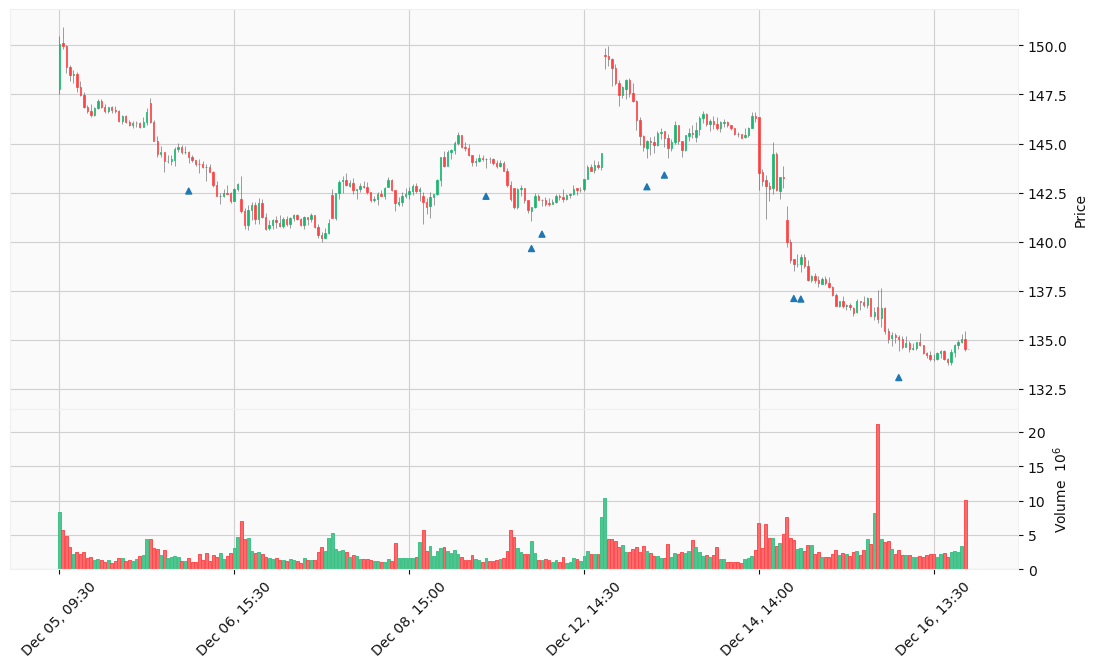

In [15]:
mpf.plot(data,addplot=cdl_plot ,type='candle',style='yahoo',figsize=(14,8),volume=True)

In [16]:
buy_signal = ['morningstar','hammer','3whitesoldiers']
sell_signal = ['eveningstar','shootingstar','3blackcrows']

all_signal = buy_signal+sell_signal

In [17]:
df = data.copy()
df.ta.cdl_pattern(name=all_signal,append=True)
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'CDL_MORNINGSTAR', 'CDL_HAMMER', 'CDL_3WHITESOLDIERS',
       'CDL_EVENINGSTAR', 'CDL_SHOOTINGSTAR', 'CDL_3BLACKCROWS'],
      dtype='object')

In [18]:
df.loc[(df.iloc[:,-4]!=0 )| (df.iloc[:,-5]!=0) | (df.iloc[:,-6]!=0)]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,CDL_MORNINGSTAR,CDL_HAMMER,CDL_3WHITESOLDIERS,CDL_EVENINGSTAR,CDL_SHOOTINGSTAR,CDL_3BLACKCROWS
Datetime,,,,,,,,,,,,,
2022-12-06 12:15:00-05:00,144.570007,144.615005,144.020004,144.309998,1559104,0,0,0.0,100.0,0.0,0.0,0.0,0.0
2022-12-09 10:00:00-05:00,141.809998,142.550003,141.199997,142.289993,3407200,0,0,100.0,0.0,0.0,0.0,0.0,0.0
2022-12-09 10:45:00-05:00,143.149994,144.309998,142.850006,144.294998,3070569,0,0,0.0,0.0,100.0,0.0,0.0,0.0
2022-12-09 14:00:00-05:00,144.195007,144.249893,143.750000,144.235001,1581091,0,0,0.0,100.0,0.0,0.0,0.0,0.0
2022-12-12 10:45:00-05:00,141.570007,141.789993,141.059998,141.764999,4054473,0,0,0.0,100.0,0.0,0.0,0.0,0.0
2022-12-12 11:30:00-05:00,142.139999,142.149399,141.800003,142.134995,1347228,0,0,0.0,100.0,0.0,0.0,0.0,0.0
2022-12-13 12:30:00-05:00,144.794998,145.169998,144.240005,145.140106,2641065,0,0,0.0,100.0,0.0,0.0,0.0,0.0
2022-12-13 13:45:00-05:00,145.619995,145.639999,144.839996,145.300003,1616294,0,0,0.0,100.0,0.0,0.0,0.0,0.0
2022-12-15 10:00:00-05:00,139.100006,139.139999,138.490005,138.860001,4247190,0,0,0.0,100.0,0.0,0.0,0.0,0.0


In [19]:
df.loc[(df.iloc[:,-6]!=0 )| (df.iloc[:,-5]!=0) | (df.iloc[:,-4]!=0), 'signal'] = 'buy'
df.loc[(df.iloc[:,-4]!=0 )| (df.iloc[:,-3]!=0) | (df.iloc[:,-2]!=0), 'signal'] = 'sell'

In [20]:
df.loc[df['signal'] == 'buy', 'mark_price'] = df['Low'] *0.99
df.loc[df['signal'] == 'sell','mark_price']  = df['High'] *1.01


In [21]:
marks = ['^' if x == 'buy' else 'v' if x == 'sell' else '' for x in df['signal']]
color = ['g' if x == 'buy' else 'r' if x == 'sell' else 'b' for x in df['signal']]
cdl_plot = mpf.make_addplot(df['mark_price'],type='scatter',marker=marks,color=color)

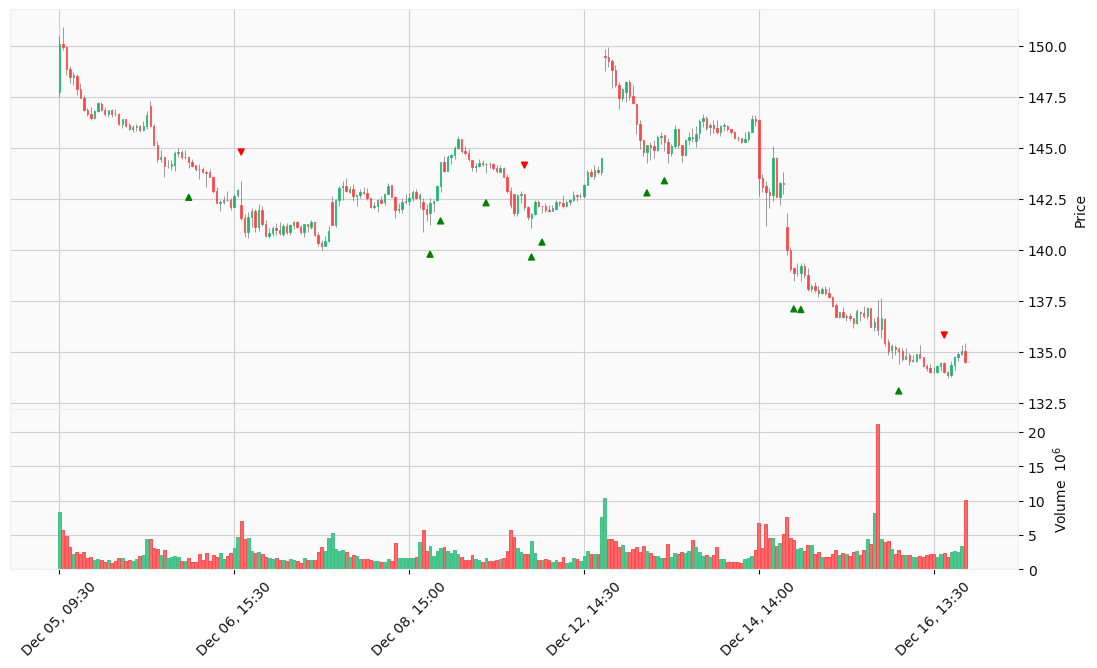

In [22]:
mpf.plot(data,addplot=cdl_plot ,type='candle',style='yahoo',figsize=(14,8),volume=True)